In [1]:
from RTER import RegressionTree
from Distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

In [13]:
density=TestDistribution(15,1).returnDistribution()
np.random.seed(1)
X_train,pdf_X_train=density.generate(1000)
Y_train_true = np.sin(2*X_train).ravel()
Y_train_noise = np.random.normal(scale=0.3,size=X_train.shape[0])
Y_train=Y_train_true+Y_train_noise

X_test= np.arange(0,1,0.0005).reshape(-1,1)
Y_test_true = np.sin(2*X_test)



In [16]:
RT_model=RegressionTree(estimator="naive_estimator",min_samples_split=100,max_depth=2,random_state=1)
RT_model.fit(X_train,Y_train)
Y_hat=RT_model.predict(X_test)
MSE(Y_hat,Y_test_true)

0.004823933006974708

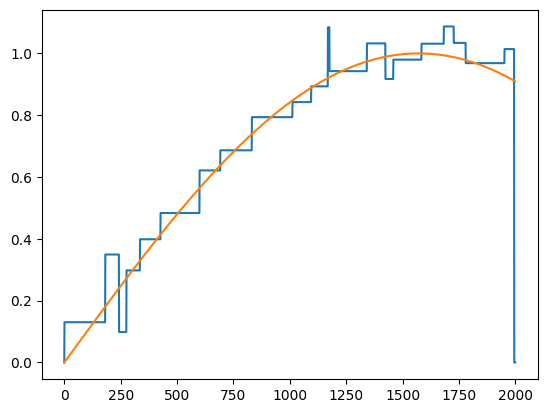

In [17]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

In [20]:
ERT_model=RegressionTree(estimator="extrapolation_estimator",min_samples_split=100,max_depth=2,order=1,random_state=1)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)
MSE(Y_hat,Y_test_true)

0.007217738249451783

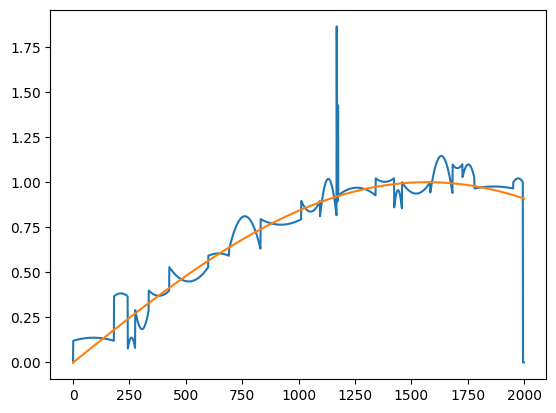

In [21]:
plt.plot(Y_hat)
plt.plot(Y_test_true)